<a href="https://colab.research.google.com/github/thanachai-npr/CE888/blob/main/Lab_6/Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [8]:
df_country = pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv")

In [9]:
x = df_country.iloc[:,1:].values
print(x)

[[9.02e+01 1.00e+01 7.58e+00 ... 5.62e+01 5.82e+00 5.53e+02]
 [1.66e+01 2.80e+01 6.55e+00 ... 7.63e+01 1.65e+00 4.09e+03]
 [2.73e+01 3.84e+01 4.17e+00 ... 7.65e+01 2.89e+00 4.46e+03]
 ...
 [2.33e+01 7.20e+01 6.84e+00 ... 7.31e+01 1.95e+00 1.31e+03]
 [5.63e+01 3.00e+01 5.18e+00 ... 6.75e+01 4.67e+00 1.31e+03]
 [8.31e+01 3.70e+01 5.89e+00 ... 5.20e+01 5.40e+00 1.46e+03]]


In [10]:
sc = StandardScaler()
X = sc.fit_transform(x)


In [11]:
pca = PCA()
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

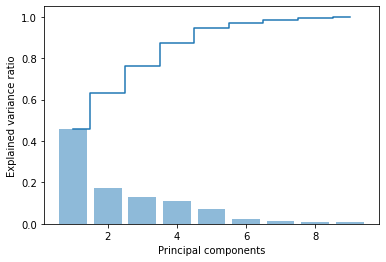

In [12]:
plt.bar(range(1, 10), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 10), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [31]:
pca = PCA(n_components=5)
X_PCA = pca.fit_transform(X_pca)


In [41]:
km =cluster.KMeans(n_clusters=3)
km.fit(X_PCA)
Result = km.labels_

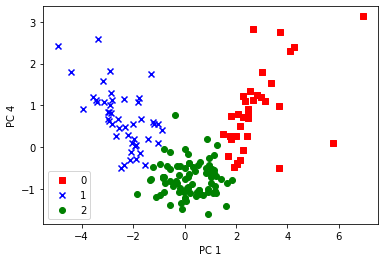

In [42]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(km.labels_), colors, markers):
    plt.scatter(X_PCA[km.labels_ == l, 0], 
                X_PCA[km.labels_ == l, 3], 
                c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 4')
    plt.legend()

In [43]:
print(Result)

[1 2 2 1 2 2 2 0 0 2 2 0 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 0 0 0 2 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


In [44]:
df_country['Class'] = Result

In [45]:
df_country.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [46]:
df_country[df_country['Class'] == 0].head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0


In [47]:
df_country[df_country['Class'] == 1].head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1


In [48]:
df_country[df_country['Class'] == 2].head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2


According to the data, we found that Cluster 0 is developped country, Cluster 1 is under developped country and Cluster 2 is developping country.


The criterion are GDPP, income, life_expec and child_mort
GDPP, income and life_expec in developed countries are highest followed by developing and under-developed respectively. However, child_mort is in the reversed order, under-developed countries have the highest rate and developed countries have the lowest rate



There are 36 countries belong to developped countries
There are 47 countries belong to under developped countries
There are 84 countries belong to developping countries

In [54]:
print(df_country[df_country['Class'] == 0])

                  country  child_mort  exports  ...  total_fer    gdpp  Class
7               Australia         4.8     19.8  ...       1.93   51900      0
8                 Austria         4.3     51.3  ...       1.44   46900      0
11                Bahrain         8.6     69.5  ...       2.16   20700      0
15                Belgium         4.5     76.4  ...       1.86   44400      0
23                 Brunei        10.5     67.4  ...       1.84   35300      0
29                 Canada         5.6     29.1  ...       1.63   47400      0
42                 Cyprus         3.6     50.2  ...       1.42   30800      0
43         Czech Republic         3.4     66.0  ...       1.51   19800      0
44                Denmark         4.1     50.5  ...       1.87   58000      0
53                Finland         3.0     38.7  ...       1.87   46200      0
54                 France         4.2     26.8  ...       2.03   40600      0
58                Germany         4.2     42.3  ...       1.39  

In [55]:
print(df_country[df_country['Class'] == 1])

                      country  child_mort  exports  ...  total_fer   gdpp  Class
0                 Afghanistan        90.2    10.00  ...       5.82    553      1
3                      Angola       119.0    62.30  ...       6.16   3530      1
17                      Benin       111.0    23.80  ...       5.36    758      1
21                   Botswana        52.5    43.60  ...       2.88   6350      1
25               Burkina Faso       116.0    19.20  ...       5.87    575      1
26                    Burundi        93.6     8.92  ...       6.26    231      1
28                   Cameroon       108.0    22.20  ...       5.11   1310      1
31   Central African Republic       149.0    11.80  ...       5.21    446      1
32                       Chad       150.0    36.80  ...       6.59    897      1
36                    Comoros        88.2    16.50  ...       4.75    769      1
37           Congo, Dem. Rep.       116.0    41.10  ...       6.54    334      1
38                Congo, Rep

In [56]:
print(df_country[df_country['Class'] == 2])

                 country  child_mort  exports  ...  total_fer   gdpp  Class
1                Albania        16.6     28.0  ...       1.65   4090      2
2                Algeria        27.3     38.4  ...       2.89   4460      2
4    Antigua and Barbuda        10.3     45.5  ...       2.13  12200      2
5              Argentina        14.5     18.9  ...       2.37  10300      2
6                Armenia        18.1     20.8  ...       1.69   3220      2
..                   ...         ...      ...  ...        ...    ...    ...
160              Uruguay        10.6     26.3  ...       2.08  11900      2
161           Uzbekistan        36.3     31.7  ...       2.34   1380      2
162              Vanuatu        29.2     46.6  ...       3.50   2970      2
163            Venezuela        17.1     28.5  ...       2.47  13500      2
164              Vietnam        23.3     72.0  ...       1.95   1310      2

[84 rows x 11 columns]
